In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('covid_19.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Missing values:
City or Regency, Special Status, Time Zone, Island, Province


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21117 non-null  object 
 13  Country         

In [26]:
df = df.drop(['City or Regency', 'Special Status', 'Time Zone', 'Island'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21117 non-null  object 
 13  Country         

Mencari Rata-rata

In [28]:
df['New Cases'].mean()

391.29357966818327

Mencari Median

In [29]:
df['New Cases'].median()

41.0

Mencari Modus

In [34]:
df['Province'].mode()[0]

'DKI Jakarta'

In [43]:
# Get the Mean, Median, Mode, Min, and Max

print ('Min: ' + str(df['Total Cases'].min()))
print ('Mode: ' + str(df['Total Cases'].mode()[0]))
print ('Median: ' + str(df['Total Cases'].median()))
print ('Mean: ' + str(df['Total Cases'].mean()))
print ('Max: ' + str(df['Total Cases'].max()))

Min: 1
Mode: 2
Median: 10780.0
Mean: 85259.97081667357
Max: 4257243


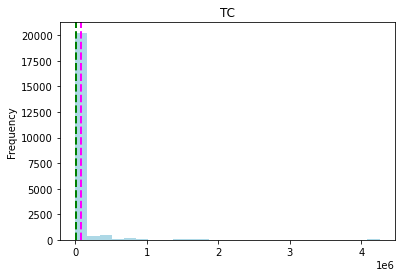

In [44]:
# Create a Histogram of Salary

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

TC = df['Total Cases']
TC.plot.hist(title='TC', color='lightblue', bins=25)  
plt.axvline(TC.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(TC.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

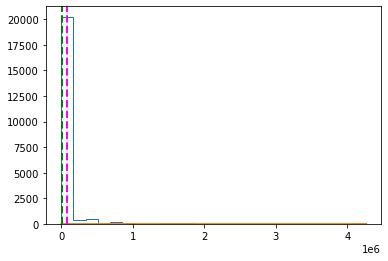

In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

TC = df['Total Cases']
density = stats.gaussian_kde(TC)
n, x, _ = plt.hist(TC, histtype='step', bins=25) 
plt.plot(x, density(x)*10**5)
plt.axvline(TC.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(TC.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()